# Random Forest - Time Series Analysis

# Importing libraries

In [18]:
#for file importing 
import pandas as pd
import numpy as np

# plotting
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from pylab import rcParams


# scikit-learn

from math import sqrt
import statistics as st
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import Imputer as SimpleImputer
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error

#datetime
import datetime as dt



# Importing dataset

In [19]:
data = pd.read_csv('D://final1.csv',parse_dates=True,index_col='Date/Time')

In [20]:
data.head()

,Wind Speed (m/s)
Date/Time,
2018-01-01 00:00:00,5.311336
2018-01-01 00:10:00,5.672167
2018-01-01 00:20:00,5.216037
2018-01-01 00:30:00,5.659674
2018-01-01 00:40:00,5.577941


In [41]:
#creating lags(i.e previous one hour)
for obs in range(1,7):
    data["T_" + str(obs)] = data["Wind Speed (m/s)"].shift(obs)
data.fillna(0.00,inplace=True)
data.head()

,index,Date/Time,Wind Speed (m/s),T_1,T_2,T_3,T_4,T_5,T_6
0,0,2018-01-01 00:00:00,5.311336,0.000000,0.000000,0.000000,0.000000,0.0,0.0
1,1,2018-01-01 00:10:00,5.672167,5.311336,0.000000,0.000000,0.000000,0.0,0.0
2,2,2018-01-01 00:20:00,5.216037,5.672167,5.311336,0.000000,0.000000,0.0,0.0
3,3,2018-01-01 00:30:00,5.659674,5.216037,5.672167,5.311336,0.000000,0.0,0.0
4,4,2018-01-01 00:40:00,5.577941,5.659674,5.216037,5.672167,5.311336,0.0,0.0


# splitting datasets

In [43]:
# Jan to july
train_data=pd.DataFrame(data[0:30528])

In [44]:
#Aug
val_data=pd.DataFrame(data[30528:34992])

In [45]:
#Sept to Dec
test_data=pd.DataFrame(data[34992:])

In [46]:
clean_train = train_data[[ 'Wind Speed (m/s)', 'T_1','T_2', 'T_3', 'T_4', 'T_5','T_6']]
clean_test = test_data[[ 'Wind Speed (m/s)', 'T_1','T_2', 'T_3', 'T_4', 'T_5','T_6']]
clean_val = val_data[[ 'Wind Speed (m/s)', 'T_1','T_2', 'T_3', 'T_4', 'T_5','T_6']]

In [47]:
X_train,y_train = clean_train.drop(["Wind Speed (m/s)"],axis=1),clean_train["Wind Speed (m/s)"]
X_test,y_test = clean_test.drop(["Wind Speed (m/s)"],axis=1),clean_test["Wind Speed (m/s)"]
X_val,y_val = clean_val.drop(["Wind Speed (m/s)"],axis=1),clean_val["Wind Speed (m/s)"]

In [48]:
#normalization
scaler = StandardScaler()

# Randomforest 

In [50]:
rfr  = RandomForestRegressor(random_state=20,verbose=2,n_jobs=5)

In [51]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)
X_valid_scaled = scaler.fit_transform(X_val)

In [52]:
rfr.fit(X_train_scaled,y_train)

C:\ProgramData\Anacondaa3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
[Parallel(n_jobs=5)]: Using backend ThreadingBackend with 5 concurrent workers.


building tree 1 of 10building tree 2 of 10

building tree 3 of 10
building tree 4 of 10
building tree 5 of 10
building tree 6 of 10
building tree 7 of 10
building tree 8 of 10
building tree 9 of 10
building tree 10 of 10


[Parallel(n_jobs=5)]: Done   7 out of  10 | elapsed:    0.4s remaining:    0.1s
[Parallel(n_jobs=5)]: Done  10 out of  10 | elapsed:    0.5s finished


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=5,
                      oob_score=False, random_state=20, verbose=2,
                      warm_start=False)

In [53]:
rfr.score(X_val,y_val)

[Parallel(n_jobs=5)]: Using backend ThreadingBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=5)]: Done  10 out of  10 | elapsed:    0.0s finished


-20.267083720339983

In [54]:
rfr.score(X_test,y_test)

[Parallel(n_jobs=5)]: Using backend ThreadingBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=5)]: Done  10 out of  10 | elapsed:    0.0s finished


-12.544272411344998

In [55]:
test_data["RF_PREDICTED"] = rfr.predict(X_test_scaled)

[Parallel(n_jobs=5)]: Using backend ThreadingBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=5)]: Done  10 out of  10 | elapsed:    0.0s finished


In [56]:
test_data.head(5)

,index,Date/Time,Wind Speed (m/s),T_1,T_2,T_3,T_4,T_5,T_6,RF_PREDICTED
34992,34992,2018-09-01 00:00:00,4.917778,13.021560,12.695070,12.649030,12.996810,12.70254,12.76211,13.432766
34993,34993,2018-09-01 00:10:00,5.039464,4.917778,13.021560,12.695070,12.649030,12.99681,12.70254,4.668679
34994,34994,2018-09-01 00:20:00,5.169604,5.039464,4.917778,13.021560,12.695070,12.64903,12.99681,4.443482
34995,34995,2018-09-01 00:30:00,5.490445,5.169604,5.039464,4.917778,13.021560,12.69507,12.64903,4.813189
34996,34996,2018-09-01 00:40:00,5.230740,5.490445,5.169604,5.039464,4.917778,13.02156,12.69507,5.550924


In [71]:
test_data['Dates'] = pd.to_datetime(data['Date/Time'], format='%Y:%M:%D').dt.date
test_data['Hours'] = pd.to_datetime(data['Date/Time'], format='%H:%M:%S').dt.time
test_data['day_of_year']=data['Date/Time'].dt.dayofyear
test_data["month"]=data['Date/Time'].dt.month
test_data.head()

,index,Date/Time,Wind Speed (m/s),T_1,T_2,T_3,T_4,T_5,T_6,RF_PREDICTED,Dates,Hours,day_of_year,month
34992,34992,2018-09-01 00:00:00,4.917778,13.021560,12.695070,12.649030,12.996810,12.70254,12.76211,13.432766,2018-09-01,00:00:00,244,9
34993,34993,2018-09-01 00:10:00,5.039464,4.917778,13.021560,12.695070,12.649030,12.99681,12.70254,4.668679,2018-09-01,00:10:00,244,9
34994,34994,2018-09-01 00:20:00,5.169604,5.039464,4.917778,13.021560,12.695070,12.64903,12.99681,4.443482,2018-09-01,00:20:00,244,9
34995,34995,2018-09-01 00:30:00,5.490445,5.169604,5.039464,4.917778,13.021560,12.69507,12.64903,4.813189,2018-09-01,00:30:00,244,9
34996,34996,2018-09-01 00:40:00,5.230740,5.490445,5.169604,5.039464,4.917778,13.02156,12.69507,5.550924,2018-09-01,00:40:00,244,9


In [85]:
test_data=test_data.set_index('Date/Time')

In [86]:
test_data.head()

,Wind Speed (m/s),T_1,T_2,T_3,T_4,T_5,T_6,RF_PREDICTED,Dates,Hours,day_of_year,month
Date/Time,,,,,,,,,,,,
2018-09-01 00:00:00,4.917778,13.021560,12.695070,12.649030,12.996810,12.70254,12.76211,13.432766,2018-09-01,00:00:00,244,9
2018-09-01 00:10:00,5.039464,4.917778,13.021560,12.695070,12.649030,12.99681,12.70254,4.668679,2018-09-01,00:10:00,244,9
2018-09-01 00:20:00,5.169604,5.039464,4.917778,13.021560,12.695070,12.64903,12.99681,4.443482,2018-09-01,00:20:00,244,9
2018-09-01 00:30:00,5.490445,5.169604,5.039464,4.917778,13.021560,12.69507,12.64903,4.813189,2018-09-01,00:30:00,244,9
2018-09-01 00:40:00,5.230740,5.490445,5.169604,5.039464,4.917778,13.02156,12.69507,5.550924,2018-09-01,00:40:00,244,9


In [90]:
mse = mean_squared_error(test_data['Wind Speed (m/s)'], test_data['RF_PREDICTED'])
rms = sqrt(mse)
print('MSE: ', mse, " %" ,"\n", "RMSE: ", rms, sep = '')

MSE: 0.8886673585404373 %
RMSE: 0.9426915500525277


# Plotting

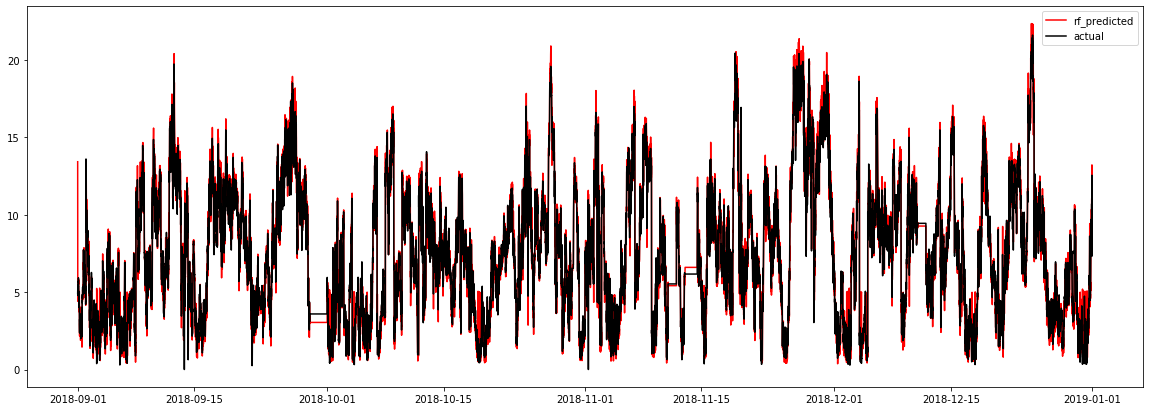

In [91]:
rcParams["figure.figsize"]=20,7
plt.plot(test_data['RF_PREDICTED'],label='rf_predicted',color="red")
plt.plot(test_data['Wind Speed (m/s)'],label="actual",color="black")
plt.legend(loc='best')


# plotting one day 

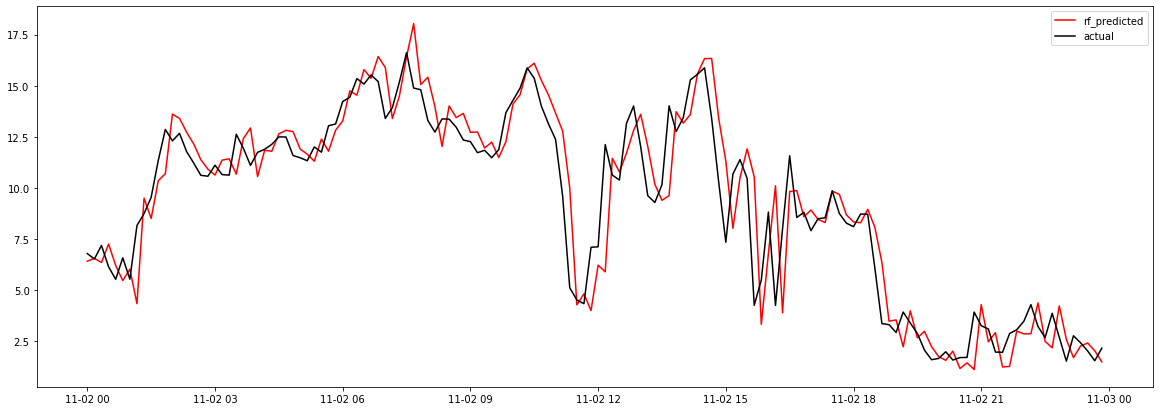

In [89]:
#plotting nov 2nd
rcParams["figure.figsize"]=20,7
plt.plot(test_data['RF_PREDICTED']['2018-11-02'],label='rf_predicted',color="red")
plt.plot(test_data['Wind Speed (m/s)']['2018-11-02'],label="actual",color="black")
plt.legend(loc='best')